In [58]:
%matplotlib inline
from __future__ import division
import pandas as pd
import matplotlib.pylab as plt
import csv

In [93]:
pca_out = 'PAH_VQSR_0601.plus.HapMap.pca.evec'

with open(pca_out) as f:
    head = f.readline()
    new_head = ['sample', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 
                'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 
                'case/control', 'race']
    fw = open('temp.csv','wb')
    w = csv.writer(fw)
    w.writerow(new_head)
    for line in f:
        lst = line.strip().split()
        if lst[-1] == 'Control':
            lst.append(lst[0].split(':')[0])
            w.writerow(lst)       
            
            
        else:
            # a subset start with PCA1 > 0 AND PCA2 > 0
            
            if True: not lst[0].startswith('0') and float(lst[1]) >= 0.01 and float(lst[2]) >= 0.015 and float(lst[3]) >= - 0.01 :
                lst.append('PAH_samples')    
                #lst.append(lst[0].split(':')[0])
                w.writerow(lst)    
                
            
             
    fw.close()

In [94]:
df = pd.read_csv('temp.csv', na_values='')
df[:5]


,sample,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,case/control,race
0,FPPH118-01:FPPH118-01,0.0191,0.0239,0.0088,0.0214,-0.0030,-0.0026,0.0064,0.0093,-0.0017,-0.0085,Case,PAH_samples
1,FPPH118-02:FPPH118-02,0.0169,0.0223,0.0097,0.0122,0.0033,0.0035,0.0089,0.0082,-0.0028,-0.0157,Case,PAH_samples
2,FPPH118-03:FPPH118-03,0.0177,0.0241,0.0068,0.0170,0.0039,-0.0055,0.0067,0.0111,0.0011,-0.0163,Case,PAH_samples
3,FPPH126-01:FPPH126-01,0.0173,0.0217,0.0098,0.0093,0.0029,0.0004,0.0049,0.0077,-0.0124,-0.0081,Case,PAH_samples
4,FPPH126-03:FPPH126-03,0.0171,0.0221,0.0069,0.0021,0.0032,-0.0017,0.0033,0.0081,-0.0033,-0.0125,Case,PAH_samples


In [95]:
import seaborn as sns
#g = sns.pairplot(df, hue="race")

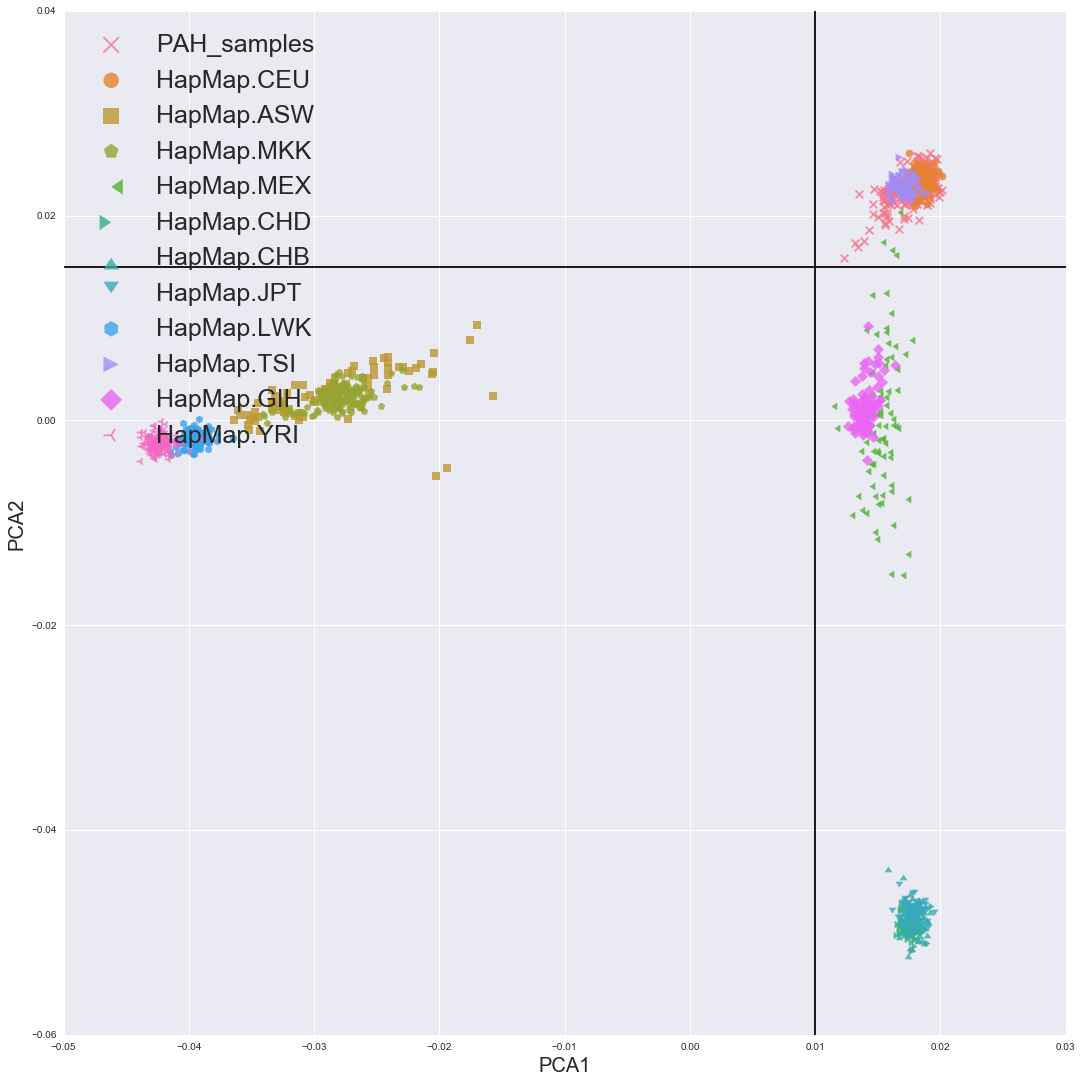

In [96]:
plt.figure(figsize=(20,10))
markers = ['x', 'o', 's', 'p', 4, 5, 6, 7, 'h', '>', 'D', '3']

sns.lmplot("PCA1", "PCA2", data=df, hue='race', fit_reg=False, size=15, 
           markers = markers, scatter_kws={"s": 60}, legend = False)
plt.axvline(x=0.01, color='k')
plt.axhline(y=0.015, color='k')
plt.legend(loc=2, fontsize = 25,markerscale=2)
plt.xlabel( 'PCA1', fontsize=20)
plt.ylabel( 'PCA2', fontsize=20)
plt.savefig('PAH_PCA.pdf')

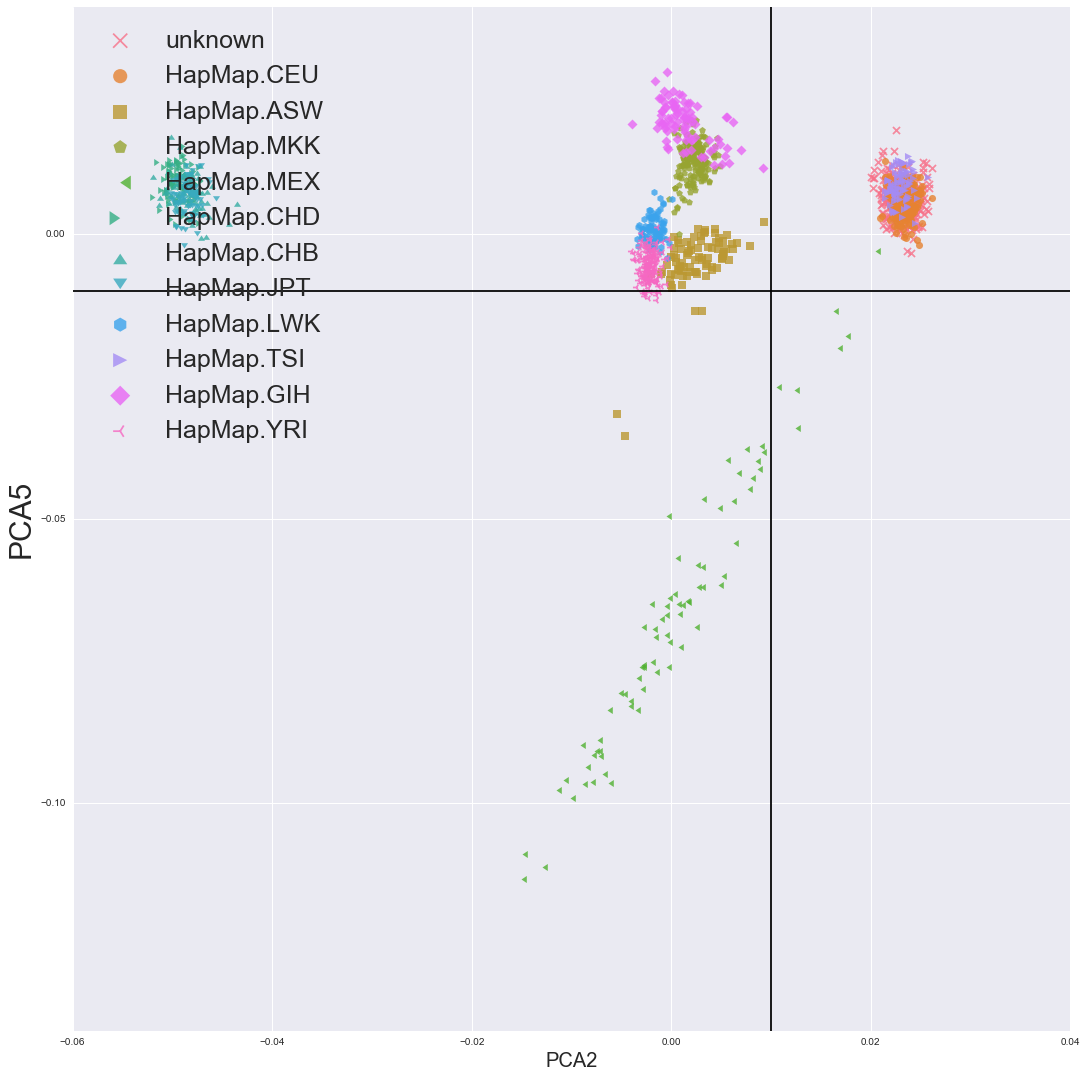

In [35]:
sns.lmplot("PCA2", "PCA3", data=df, hue='race', fit_reg=False, size=15, 
           markers = markers, scatter_kws={"s": 50},legend = False)

plt.axhline(y= - 0.01, color='k')
plt.axvline(x=0.01, color='k')
plt.legend(loc=2, fontsize = 25,markerscale=2)
plt.xlabel( 'PCA2', fontsize=20)
plt.ylabel( 'PCA5', fontsize=30)
